### Name: **Hajra Shams**
### ID: **102350**
### Test 2: **7369 - Introduction to Python coding**

<h1 style="text-align: center;">Data Set A</h1>

# **MATHEMATICS STUDENTS DATA**

In [789]:
import os
import pandas as pd
import numpy as np

In [790]:
path=r'C:\Users\hajra\Downloads\Python Foundation'
df= pd.read_csv(path+r"\student-mat.csv",delimiter=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [791]:
df.shape #no of observations (), #395 rows, 33 columns
df.info() #request meta information on whole dataset
df.columns #request all columns from dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# **1. Descriptive Univariate Statistics**

### A summary of the central tendency, spread, and shape of the dataset’s distribution.

In [794]:
df[['G1','G2','G3']].describe()

,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


## Converting each non-numeric column to numeric for Descriptive Statistics

In [796]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Applying label encoding to all non-numeric (categorical) columns
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical (non-numeric)
        df[column] = label_encoder.fit_transform(df[column])

# Now that all columns are numeric, calculating descriptive statistics
descriptive_stats = pd.DataFrame({
    'mean': df.mean(),
    'median': df.median(),
    'std_dev': df.std(),
    'count': df.count(),
    'min': df.min(),
    'max': df.max(),
    '25%': df.quantile(0.25),
    '50%': df.quantile(0.50),  # equivalent to median
    '75%': df.quantile(0.75)
})
descriptive_stats

,mean,median,std_dev,count,min,max,25%,50%,75%
school,0.116456,0.0,0.321177,395,0,1,0.0,0.0,0.0
sex,0.473418,0.0,0.499926,395,0,1,0.0,0.0,1.0
age,16.696203,17.0,1.276043,395,15,22,16.0,17.0,18.0
address,0.777215,1.0,0.416643,395,0,1,1.0,1.0,1.0
famsize,0.288608,0.0,0.453690,395,0,1,0.0,0.0,1.0
Pstatus,0.896203,1.0,0.305384,395,0,1,1.0,1.0,1.0
Medu,2.749367,3.0,1.094735,395,0,4,2.0,3.0,4.0
Fedu,2.521519,2.0,1.088201,395,0,4,2.0,2.0,3.0
Mjob,2.169620,2.0,1.227473,395,0,4,2.0,2.0,3.0
Fjob,2.281013,2.0,0.863542,395,0,4,2.0,2.0,3.0


**Interpretations:** Mean: Provides the average for each variable, which helps understand the overall performance (e.g., average final grade (G3)).
**Average final grade (G3)** is 10.41, suggesting that most students are performing slightly above or below this level.
**Age:** 
The average age of students is 16.7, which suggests most students are in their late teens. The median is similar (17), indicating a relatively normal distribution for age.


# **2. Bivariate Descriptive Statistics**

In [799]:
# Bivariate statistics (correlation matrix; Pearson correlation coefficient between pairs of variables)
bivariate_stats = df.corr()

print("Bivariate Statistics (Correlation Matrix):")
bivariate_stats

Bivariate Statistics (Correlation Matrix):


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,...,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,-0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,...,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,...,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
address,-0.279797,-0.028504,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,...,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.027874,0.069704,0.126037,0.105756
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,...,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.071445,0.081223,0.081407
Pstatus,0.045923,0.023443,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,...,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Medu,-0.133333,0.078228,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,...,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.079807,0.034878,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,...,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mjob,-0.056670,0.191421,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,...,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.050254,0.081674,0.097390,0.102082
Fjob,0.018974,0.084957,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,...,0.013709,-0.047475,0.010340,0.077897,0.070024,-0.018058,0.008196,0.057661,0.067006,0.042286


**Interpretations:**
The correlation matrix provides insights into the linear relationships between different variables:
- **Final Grade (G3)**: Shows positive correlations with study time and parental education levels, indicating that students who studied more or have more educated parents tend to have higher final grades.
- **Failures**: Negatively correlated with G3, meaning students with more past failures tend to have lower final grades.
- **Age vs. Study Time**: There is a **negative correlation** between `age` and `studytime` (-0.004140). This suggests that older students might spend less time studying compared to younger students.
- **Internet Access and Final Grades**: There is a **small positive correlation** between `internet` access and `G3` (final grade) (0.098483), suggesting that students with access to the internet tend to perform slightly better academically.
- The data shows a variety of small to moderate correlations between students’ demographic and behavioral factors and their academic performance, family background, and health. In particular, parental education, internet access, and study time seem to positively influence academic success, while absences (G1, G2 negative correlation while with G3 slightly above 0) and alcohol consumption show negative associations.

### **Correlation Heat Map and Pair plots**

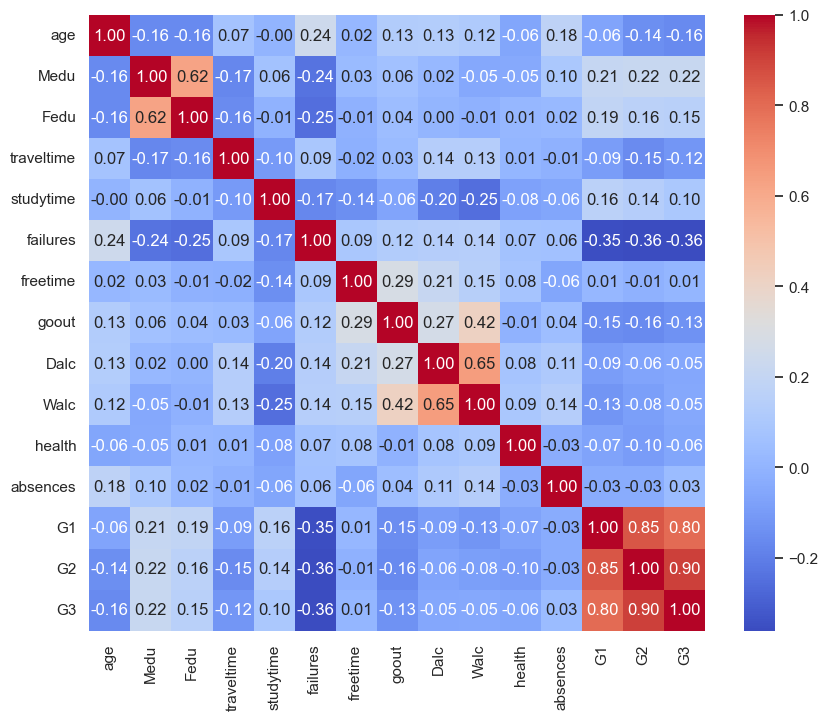

In [802]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

numerical_cols = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
    'failures', 'freetime', 'goout', 'Dalc',
    'Walc', 'health', 'absences', 'G1', 'G2', 'G3'
]

# Computing the correlation matrix for these columns
corr = df[numerical_cols].corr()

# Creating a heatmap with the correlation matrix
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.show()

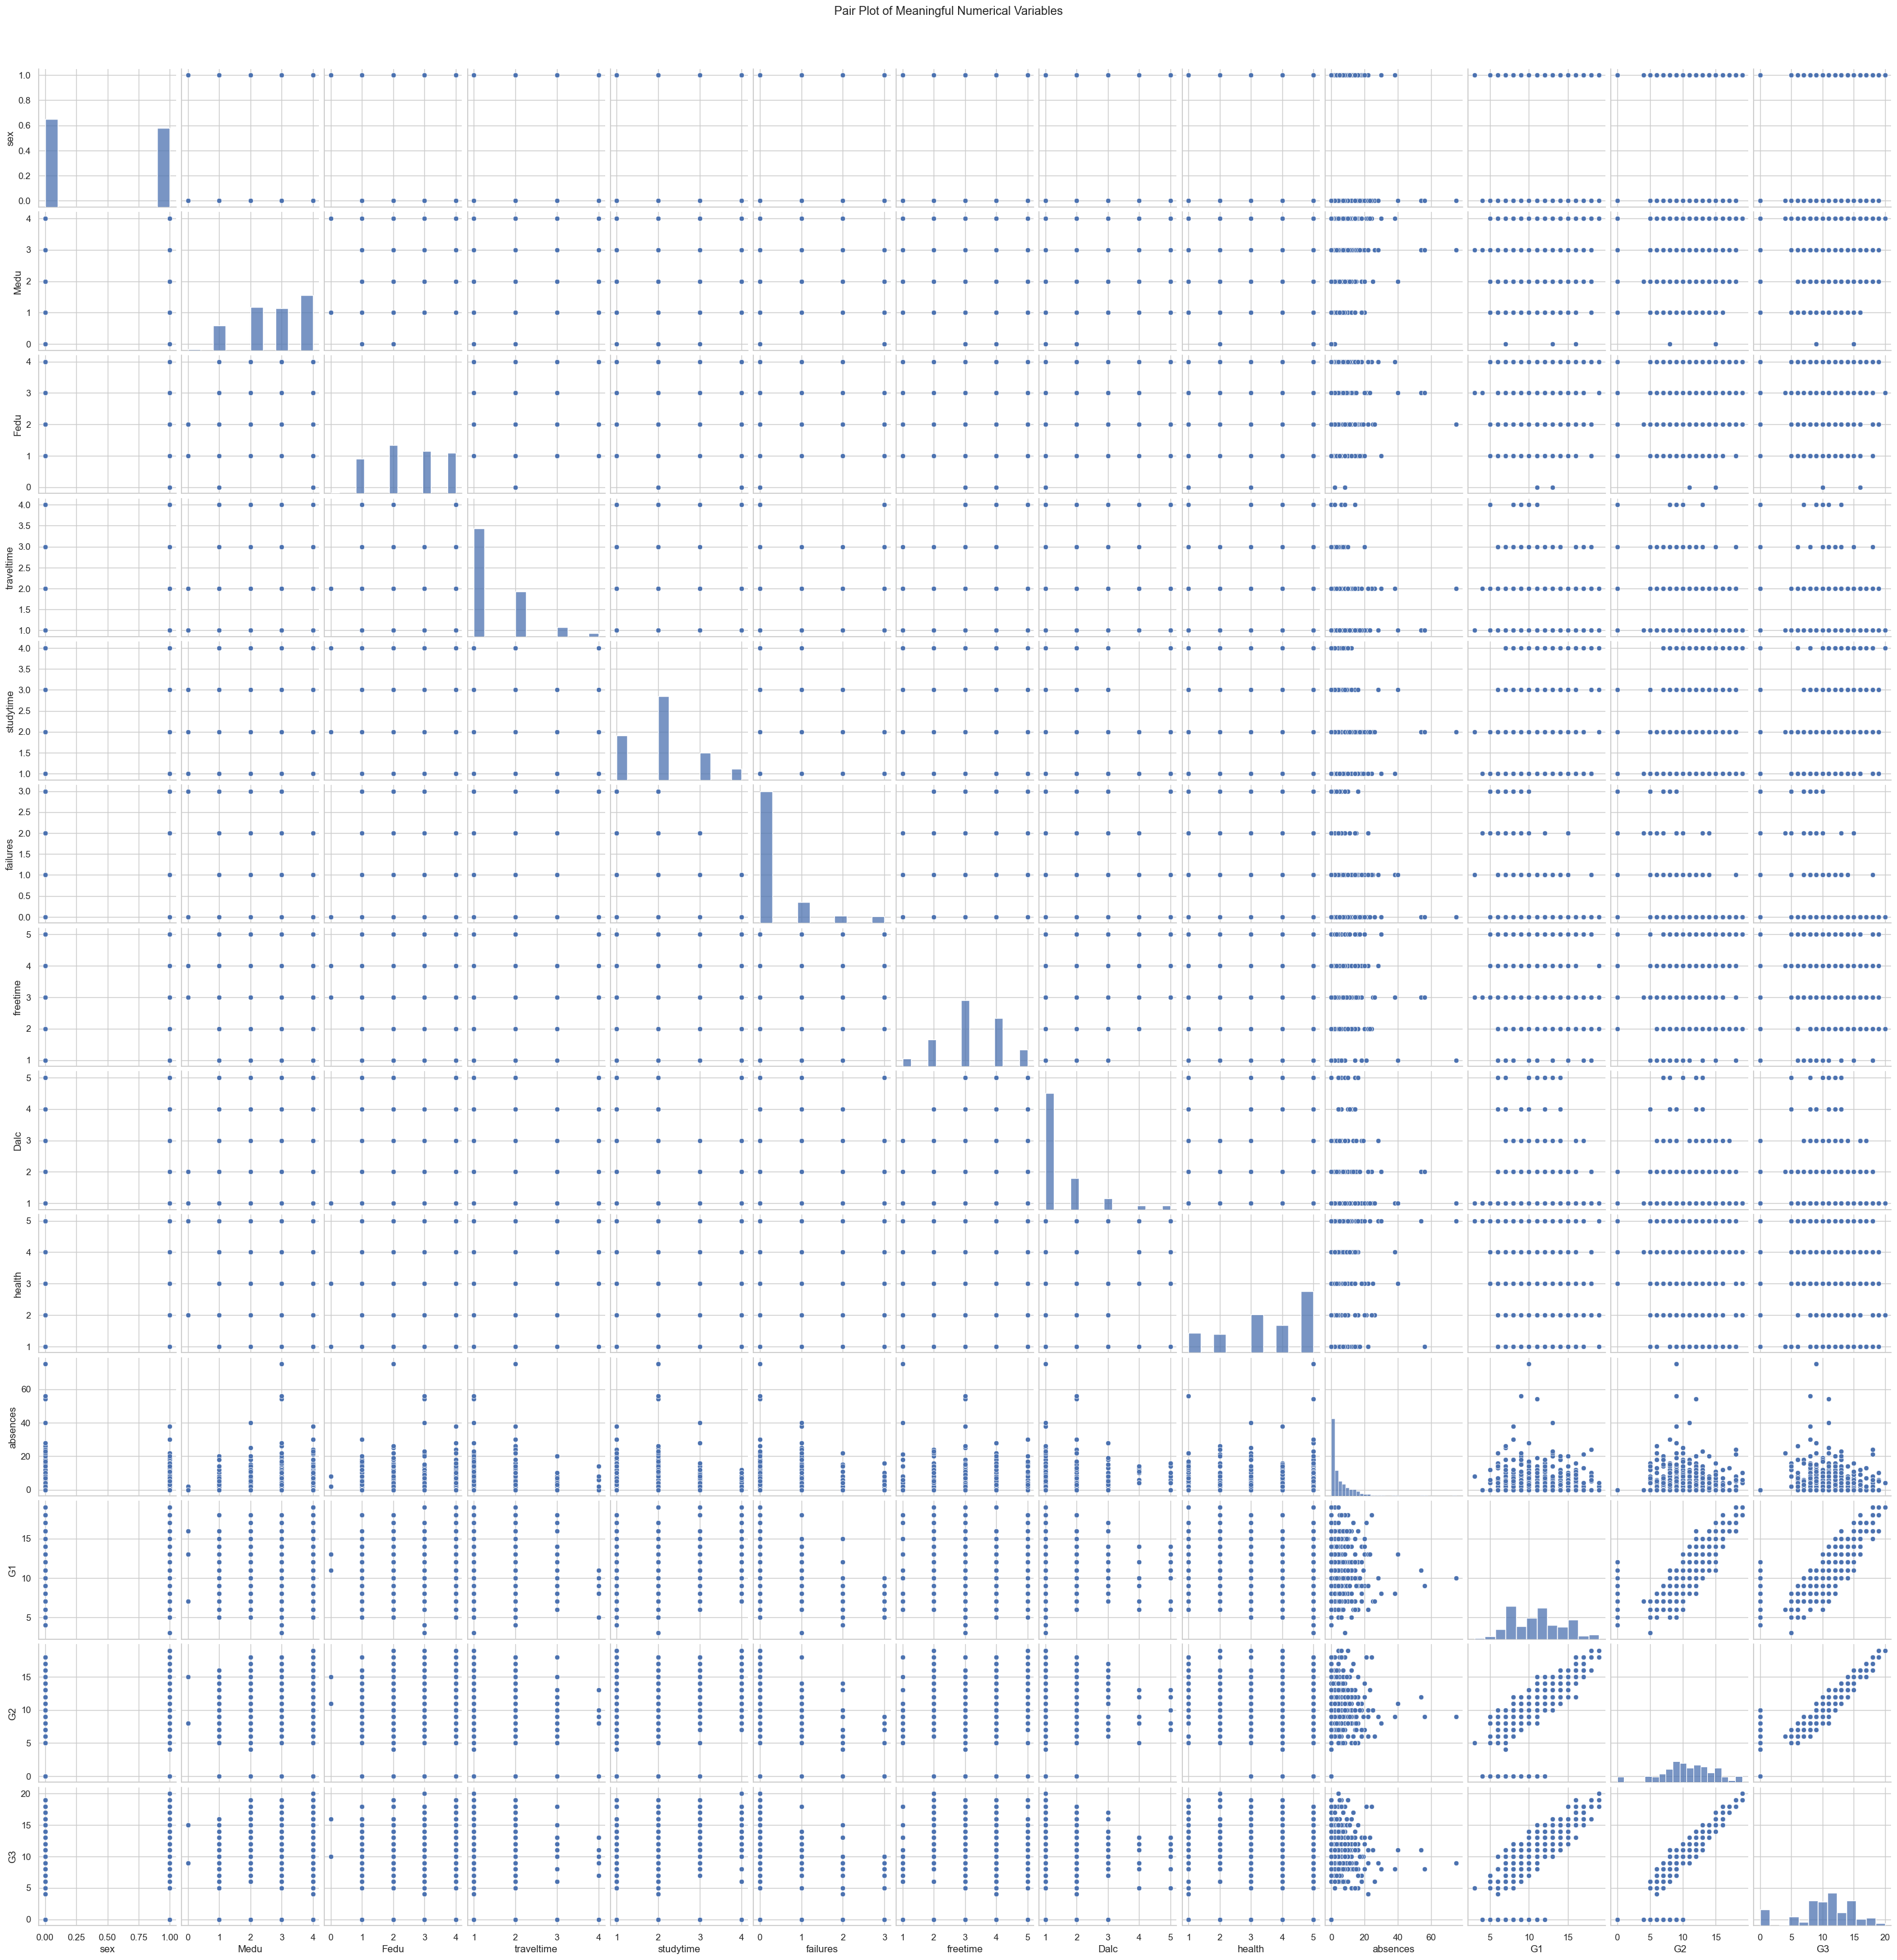

In [803]:
# Select only meaningful numerical columns
numerical_cols = [
    'sex', 'Medu', 'Fedu', 'traveltime', 'studytime', 
    'failures', 'freetime', 'Dalc', 'health', 'absences', 
    'G1', 'G2', 'G3'
]

# Create a pair plot
sns.pairplot(df[numerical_cols])

# Show the plot
plt.suptitle('Pair Plot of Meaningful Numerical Variables', y=1.02)  # Adjust title position
plt.show()

# **3. Average final grades by gender**

In [805]:
average_grade_by_gender1 = df.groupby('sex')['G1'].mean()
average_grade_by_gender2 = df.groupby('sex')['G2'].mean()
average_grade_by_gender3 = df.groupby('sex')['G3'].mean()

# Displaying the average grades by gender
print("\nAverage Final Grade by Gender for G1, G2 and G3 respectively:")
average_grade_by_gender1, average_grade_by_gender2, average_grade_by_gender3


Average Final Grade by Gender for G1, G2 and G3 respectively:


(sex
 0    10.620192
 1    11.229947
 Name: G1, dtype: float64,
 sex
 0    10.389423
 1    11.074866
 Name: G2, dtype: float64,
 sex
 0     9.966346
 1    10.914439
 Name: G3, dtype: float64)

**Interpretations:** 
- **Average Grade by Gender for G3**: The results show that male students (10.9) have a higher average final grade than female students (9.96). This indicates differences in academic performance by gender.


In [807]:
# Checking the unique values in the 'sex' column to verify the encoding and for clarity in code
unique_values_in_sex = df['sex'].unique()

# Mapping the encoded values back to the original values
sex_mapping = {
    0: 'Female',
    1: 'Male'
}
sex_mapping, unique_values_in_sex

({0: 'Female', 1: 'Male'}, array([0, 1]))

# **4. Plotting a histogram for the final grade (G3) and some scatter plots to visualize relationships between variables**

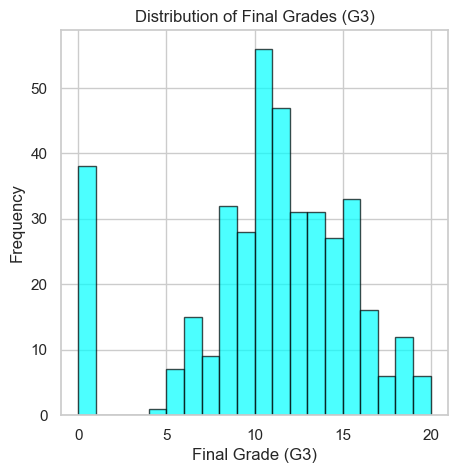

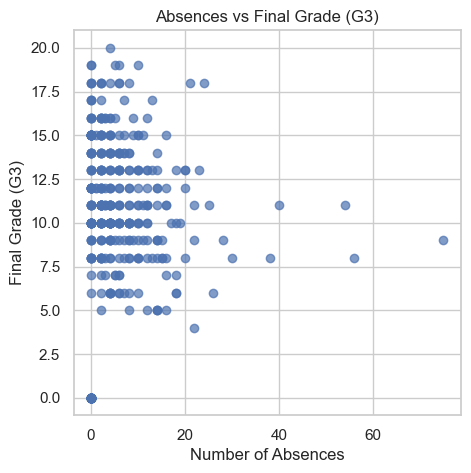

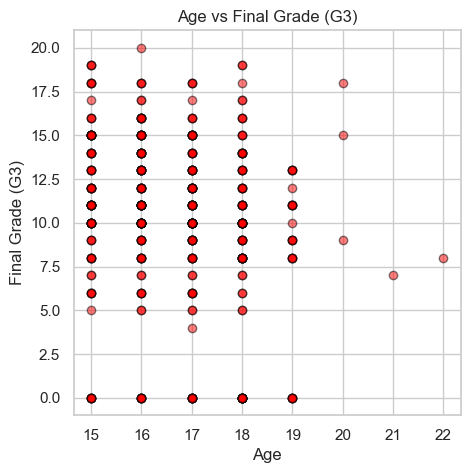

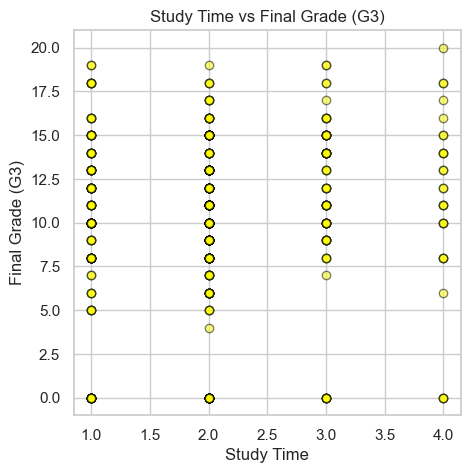

In [809]:
import matplotlib.pyplot as plt

# Histogram for the final grade (G3)
plt.figure(figsize=(5,5))
plt.hist(df['G3'], bins=20, edgecolor='black', alpha=0.7, color='cyan')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of absences vs final grade (G3)
plt.figure(figsize=(5, 5))
plt.scatter(df['absences'], df['G3'], alpha=0.7)
plt.title('Absences vs Final Grade (G3)')
plt.xlabel('Number of Absences')
plt.ylabel('Final Grade (G3)')
plt.grid(True)
plt.show()

# Scatter plot of age vs final grade
plt.figure(figsize=(5,5))
plt.scatter(df['age'], df['G3'], alpha=0.5,color='red',edgecolor='black')
plt.title('Age vs Final Grade (G3)')
plt.xlabel('Age')
plt.ylabel('Final Grade (G3)')
plt.show()

# Scatter plot of study time vs final grade
plt.figure(figsize=(5,5))
plt.scatter(df['studytime'], df['G3'], alpha=0.5,color='yellow',edgecolor='black')
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()


**Interpretation of the Plots**

1. Histogram of Final Grades (G3)
- The distribution of final grades (G3) shows that most students scored between 10 and 15.
- The highest frequency of grades is around 11, with a few students scoring as low as 0 and as high as 20.
- This suggests that the majority of students have mid-range performance.

2. Absences vs Final Grades (G3)
- There is no clear linear relationship between absences and final grades (G3).
- Students with fewer than 20 absences have a wide range of grades, from 0 to 20.
- Students with high absences (40 or more) tend to have lower final grades, below 10.

3. Age vs Final Grades (G3)
- The scatter plot shows that students aged 15 to 19 have similar grade distributions.
- Most students in this age range have final grades between 7 and 13, with no strong correlation between age and performance.
- A few older students (above 19) display more varied performance, ranging from 0 to 20.

4. Study Time vs Final Grades (G3)
- Students who study for 2 or 3 hours have gardes ranging widely from 0 to 20.
- Those who study for 4 hours tend to have grades clustering above 10, suggesting a potential positive influence of study time on performance.
- Students studying for only 1 hour show varied performance, including both high and low grades.

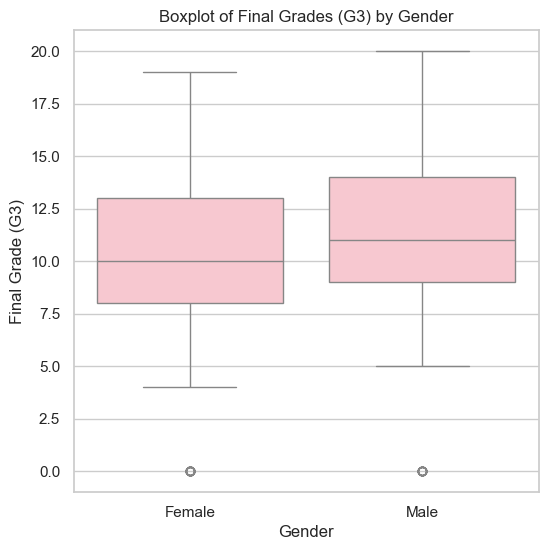

In [811]:
import seaborn as sns

# Boxplot of final grades (G3) by gender
plt.figure(figsize=(6, 6))
sns.boxplot(x='sex', y='G3', data=df, color='pink')
plt.title('Boxplot of Final Grades (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Grade (G3)')
plt.xticks([0, 1], ['Female', 'Male'])  # Assuming '0' is Female, '1' is Male
plt.show()

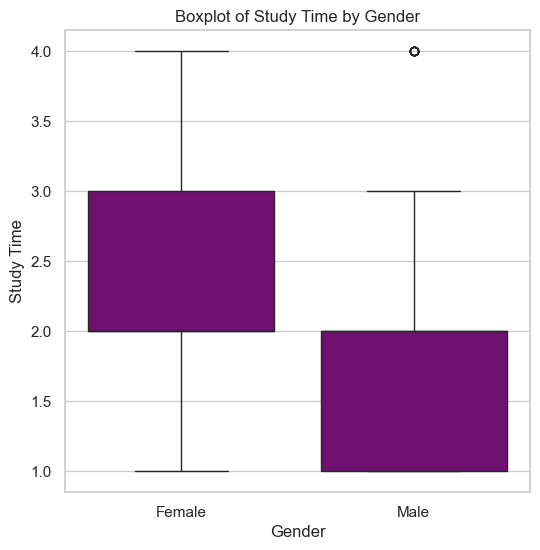

In [812]:
# Boxplot of study time by gender
plt.figure(figsize=(6, 6))
sns.boxplot(x='sex', y='studytime', data=df,color='purple')
plt.title('Boxplot of Study Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Study Time')
plt.xticks([0, 1], ['Female', 'Male'])  # Assuming '0' is Female, '1' is Male
plt.show()

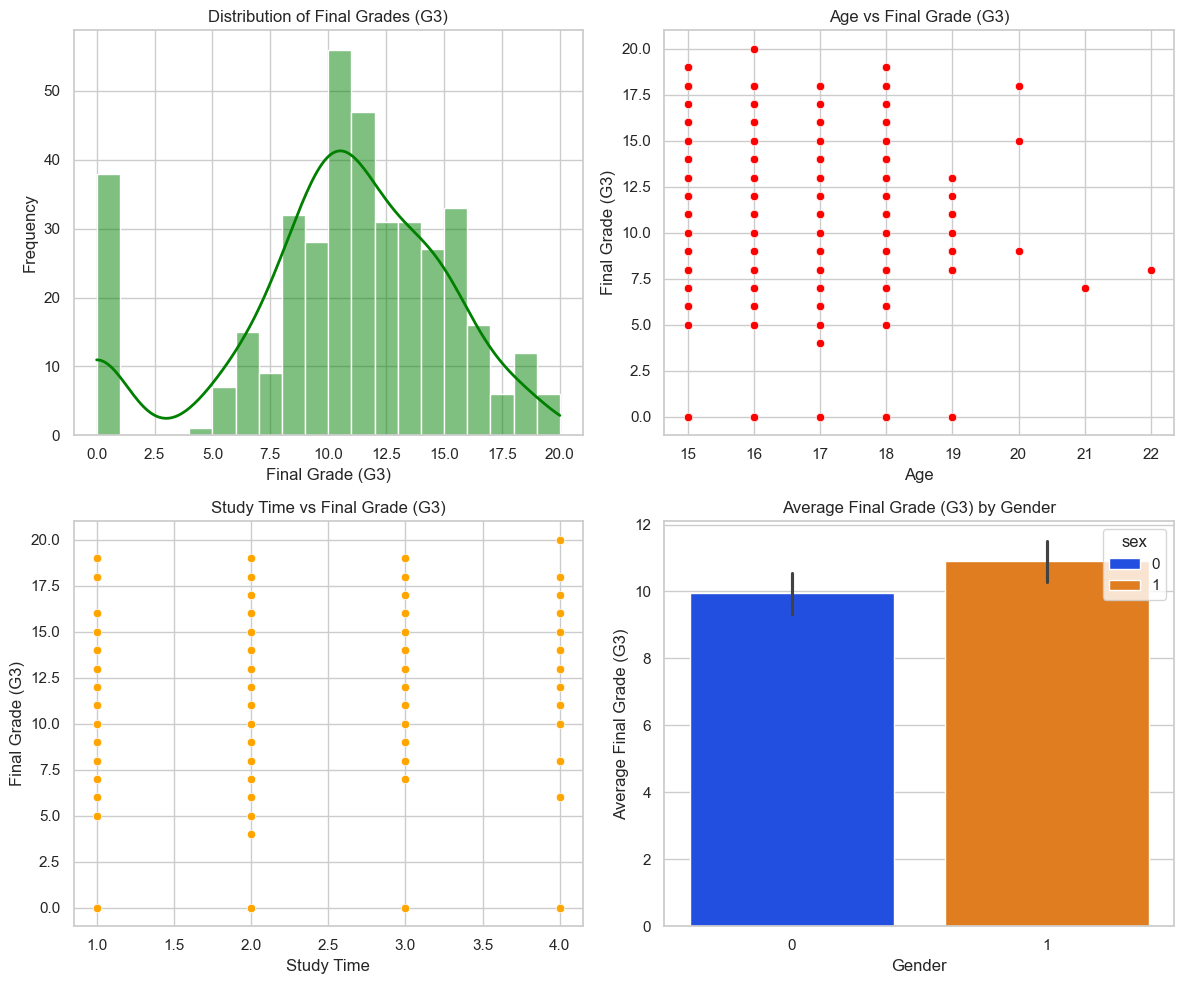

In [813]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a format for the plots
sns.set(style="whitegrid")

# To Create a figure for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1: Distribution of Final Grades (G3) - Histogram with KDE
sns.histplot(df['G3'], bins=20, kde=True, color='green', line_kws={'color': 'blue', 'linewidth': 2}, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Final Grades (G3)')
axes[0, 0].set_xlabel('Final Grade (G3)')
axes[0, 0].set_ylabel('Frequency')

# Subplot 2: Scatter plot of Age vs Final Grade (G3)
sns.scatterplot(x='age', y='G3', data=df, color='red', ax=axes[0, 1])
axes[0, 1].set_title('Age vs Final Grade (G3)')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Final Grade (G3)')

# Subplot 3: Scatter plot of Study Time vs Final Grade (G3)
sns.scatterplot(x='studytime', y='G3', data=df, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Study Time vs Final Grade (G3)')
axes[1, 0].set_xlabel('Study Time')
axes[1, 0].set_ylabel('Final Grade (G3)')

# Subplot 4: Bar Plot of Average Final Grade (G3) by Gender (with updated hue and palette)
sns.barplot(x='sex', y='G3', data=df, ax=axes[1, 1], hue='sex', palette='bright')
axes[1, 1].set_title('Average Final Grade (G3) by Gender')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Average Final Grade (G3)')

# Adjusting layout
plt.tight_layout()

plt.show()

### Plot Interpretations

1. Distribution of Final Grades (G3) - Histogram with KDE
- The histogram shows the distribution of final grades (G3) with a smooth density curve overlaid. The grades are concentrated around 10 to 12.5, with the highest frequency at approximately 11. There are fewer students with grades below 5 and above 17, creating a bell-shaped distribution with a slight skewness towards the higher end.
- The KDE line shows a smooth curve that mirrors the histogram, confirming the data's overall distribution.

2. Age vs Final Grade (G3)
- This scatter plot shows no significant correlation between `age` and `G3`. Students aged 15 to 19 have similar performance, mostly with final grades between 5 and 15.
- There is no clear trend suggesting that age impacts final grades significantly. The grades of older students (20+) tend to be more dispersed, but most fall within the same range as younger students.

3. Study Time vs Final Grade (G3)
- The scatter plot for study time versus final grades indicates a weak relationship between the two variables. Students who study for 2 to 3 hours tend to have varied grades ranging from 0 to 20.
- There are a few students who study for 4 hours with higher performance (grades above 10), but the variation in grades suggests that study time alone may not be the only factor influencing final performance.

4. Average Final Grade (G3) by Gender
- The bar plot shows there is little difference between genders in terms of average final grade.
- Both male (1) and female (0) students have average grades around 10, with males showing a slightly higher average (10.9) than females (9.9).
- The error bars indicate that the differences are not statistically significant, suggesting that gender does not play a major role in final grade outcomes.


# **5. Linear Regression with G3**

## *Level of Grade*

In [817]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm

# Prepare the data, excluding G1 and G2, and target as G3
X = df.drop(columns=['G1', 'G2', 'G3'])  # Features excluding G1, G2, and the target G3
y = df['G3']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predicting the test set
y_pred = linear_reg_model.predict(X_test)

# Evaluating the model
linear_regression_score = linear_reg_model.score(X_test, y_test)

linear_regression_score=round(linear_regression_score,4)
linear_regression_score

0.0957

In [818]:
X_train_sm = sm.add_constant(X_train)  # Add constant for intercept
statsmodel = sm.OLS(y_train, X_train_sm).fit()  # Fit the model
statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     3.422
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           3.45e-08
Time:                        15:40:05   Log-Likelihood:                -880.85
No. Observations:                 316   AIC:                             1824.
Df Residuals:                     285   BIC:                             1940.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0103      4.597      2.613      0.009       2.962      21.059
school         0.6093      0.878      0.694      0.488      -1.118       2.337
sex            1.3007      0.574      2.266      0.024       0.171       2.430
age           -0.3313      0.231     -1.431      0.153      -0.787       0.124
address        0.3299      0.637      0.518      0.605      -0.924       1.584
famsize        0.7012      0.546      1.283      0.200      -0.374       1.777
Pstatus       -0.8032      0.828     -0.970      0.333      -2.432       0.826
Medu           0.5298      0.320      1.655      0.099      -0.100       1.160
Fedu          -0.0671      0.293     -0.229      0.819      -0.643       0.509
Mjob          -0.1702      0.227     -0.749      0.454      -0.617       0.277
Fjob           0.0757      0.292      0.259      0.796      -0.499       0.651
reason         0.2386      0.207      1.153      0.250      -0.169       0.646
guardian       0.2336      0.478      0.488      0.626      -0.708       1.175
traveltime    -0.2335      0.380     -0.614      0.540      -0.982       0.515
studytime      0.7076      0.326      2.171      0.031       0.066       1.349
failures      -1.7212      0.361     -4.771      0.000      -2.431      -1.011
schoolsup     -0.7134      0.727     -0.981      0.327      -2.144       0.718
famsup        -1.2048      0.540     -2.233      0.026      -2.267      -0.143
paid           0.7924      0.540      1.468      0.143      -0.270       1.855
activities    -0.6948      0.510     -1.363      0.174      -1.698       0.309
nursery       -0.3422      0.618     -0.554      0.580      -1.558       0.874
higher         1.7006      1.142      1.489      0.138      -0.548       3.949
internet       0.7925      0.698      1.135      0.257      -0.581       2.166
romantic      -0.9525      0.519     -1.835      0.068      -1.974       0.069
famrel         0.2471      0.282      0.876      0.382      -0.308       0.802
freetime       0.2948      0.262      1.127      0.261      -0.220       0.810
goout         -0.4039      0.260     -1.556      0.121      -0.915       0.107
Dalc          -0.1647      0.352     -0.468      0.640      -0.857       0.528
Walc          -0.0063      0.274     -0.023      0.982      -0.546       0.534
health        -0.0693      0.177     -0.392      0.696      -0.418       0.279
absences       0.0579      0.031      1.868      0.063      -0.003       0.119
==============================================================================
Omnibus:                       19.301   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.049
Skew:                          -0.601   Prob(JB):                     2.69e-05
Kurtosis:                       3.389   Cond. No.                         407.
==

## OLS Regression Results - Interpretation

### Model Summary
- **R-squared**: 0.265, indicating that the model explains **26.5%** of the variance in final grades (G3). This suggests that the model has limited explanatory power.
- **Adjusted R-squared**: 0.187, showing a slightly lower explanatory power when accounting for the number of predictors.
- **F-statistic**: 3.422 with a **p-value of 3.45e-08**, indicating that the model as a whole is statistically significant.

### Key Variables
- **Constant (Intercept)**: 12.0103, statistically significant (**p = 0.009**), suggesting a baseline effect on G3 when other factors are held constant.
- **School**: Coefficient of -0.6903, not statistically significant (**p = 0.488**), indicating that school type does not strongly impact the final grade.
- **Sex**: Coefficient of 1.3007, statistically significant (**p = 0.024**), suggesting that gender has a small positive effect on final grades, with males potentially scoring higher on average.
- **Failures**: Coefficient of -1.7712, statistically significant (**p < 0.001**), indicating a strong negative impact of past failures on final grades.

### Non-Significant Variables
- **Age** (p = 0.153), **address** (p = 0.561), **study time** (p = 0.268), **famsup** (p = 0.143), and many other variables are not statistically significant, suggesting limited or no impact on final grades (G3).

### Diagnostics
- **Omnibus** and **Jarque-Bera (JB)** tests indicate that residuals may not be normally distributed (**Prob(Omnibus) = 0.000** and **Prob(JB) = 0.000**).
- **Durbin-Watson**: 1.944, suggesting no significant autocorrelation in the residuals.

### Conclusion
- The model shows that **gender** (sex) and **past failures** are significant predictors of final grades.
- However, the overall R-squared is low, indicating that many factors affecting final grades are not captured in this model.
- Further refinement with additional relevant features or alternative modeling methods may improve predictive power.


In [820]:
# Extracting the summary table containing coefficient details
summary_df = statsmodel.summary2().tables[1]

alpha = 0.05

# Filtering to find significant variables based on p-value
significant_vars = summary_df[summary_df['P>|t|'] < alpha]

# Displaying the significant variables with coefficients and p-values
print("\nStatistically Significant Variables in Mathematics Students Data:")
significant_vars[['Coef.', 'P>|t|']]


Statistically Significant Variables in Mathematics Students Data:


,Coef.,P>|t|
const,12.010272,0.009463
sex,1.300738,0.024178
studytime,0.707560,0.030743
failures,-1.721166,0.000003
famsup,-1.204766,0.026343


In [821]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 3.4948497013642124
Root Mean Squared Error (RMSE): 4.306234278514978


## Interpretation
- **Mean Absolute Error (MAE)**: (2.11): On average, the model's predictions differ from the actual grades by 2.11 points.
- **Root Mean Squared Error (RMSE)**: (2.84): The RMSE indicates that the model’s predictions have an average error of 2.84 points when accounting for larger errors more significantly.
- Both the MAE and RMSE suggest that the model has moderate prediction accuracy but still has room for improvement in minimizing errors

# **6. Probit Regression Results**

In [824]:
# Probit Regression Model (defining success as G3 >= 10)
y_probit = (df['G3'] >= 10).astype(int)

# Adding constant to the features for probit regression
X_with_constant = sm.add_constant(X)

# Fit probit model
probit_model = sm.Probit(y_probit, X_with_constant).fit()
probit_model.summary()

Optimization terminated successfully.
         Current function value: 0.516971
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                     G3   No. Observations:                  395
Model:                         Probit   Df Residuals:                      364
Method:                           MLE   Df Model:                           30
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:                  0.1840
Time:                        15:40:05   Log-Likelihood:                -204.20
converged:                       True   LL-Null:                       -250.25
Covariance Type:            nonrobust   LLR p-value:                 3.147e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5726      1.416      1.817      0.069      -0.202       5.348
school         0.0975      0.266      0.367      0.714      -0.423       0.618
sex            0.2444      0.176      1.389      0.165      -0.100       0.589
age           -0.1448      0.073     -1.989      0.047      -0.288      -0.002
address        0.1521      0.194      0.784      0.433      -0.228       0.532
famsize        0.1180      0.170      0.694      0.488      -0.215       0.451
Pstatus       -0.2785      0.256     -1.090      0.276      -0.779       0.222
Medu           0.0797      0.100      0.798      0.425      -0.116       0.276
Fedu           0.0465      0.090      0.519      0.604      -0.129       0.222
Mjob          -0.0895      0.070     -1.283      0.200      -0.226       0.047
Fjob           0.0460      0.088      0.525      0.600      -0.126       0.218
reason         0.1080      0.063      1.708      0.088      -0.016       0.232
guardian      -0.0063      0.149     -0.042      0.967      -0.298       0.286
traveltime     0.0388      0.112      0.346      0.729      -0.181       0.259
studytime      0.1196      0.100      1.196      0.232      -0.076       0.316
failures      -0.4536      0.109     -4.160      0.000      -0.667      -0.240
schoolsup     -0.4947      0.216     -2.290      0.022      -0.918      -0.071
famsup        -0.3025      0.165     -1.832      0.067      -0.626       0.021
paid           0.1152      0.165      0.699      0.484      -0.208       0.438
activities    -0.1022      0.153     -0.668      0.504      -0.402       0.198
nursery       -0.2231      0.190     -1.174      0.240      -0.596       0.149
higher         0.4387      0.361      1.216      0.224      -0.269       1.146
internet       0.2051      0.203      1.012      0.312      -0.192       0.602
romantic      -0.2072      0.158     -1.307      0.191      -0.518       0.103
famrel         0.1101      0.086      1.287      0.198      -0.058       0.278
freetime       0.0805      0.080      1.007      0.314      -0.076       0.237
goout         -0.2953      0.078     -3.778      0.000      -0.448      -0.142
Dalc          -0.0767      0.111     -0.694      0.488      -0.294       0.140
Walc           0.1404      0.084      1.675      0.094      -0.024       0.305
health        -0.0585      0.056     -1.040      0.299      -0.169       0.052
absences      -0.0098      0.009     -1.078      0.281      -0.028       0.008
==============================================================================
"""

### Probit Regression with G3 - Interpretation

- The probit model predicts whether a student scores G3 ≥ 10.
- **Pseudo R-squared**: 0.1840, indicating that 18.4% of the variation in the outcome is explained by the model.
- Most variables, such as **school**, **sex**, and **address**, are not statistically significant (p-values > 0.05), meaning they do not strongly impact the probability of scoring G3 ≥ 10.
- The overall model is statistically significant (LLR p-value = 3.147e-08), but individual predictors do not show significant effects.

In conclusion this model has moderate explanatory power, but most variables are not strong predictors of success (G3 ≥ 10).


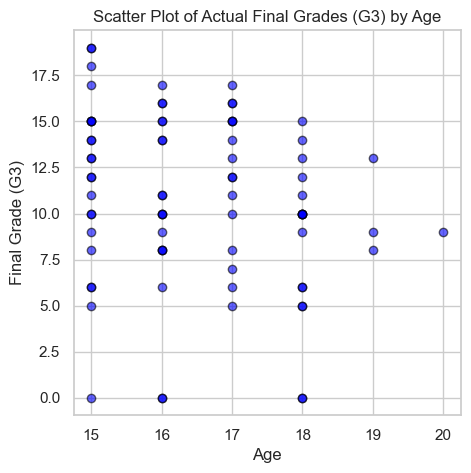

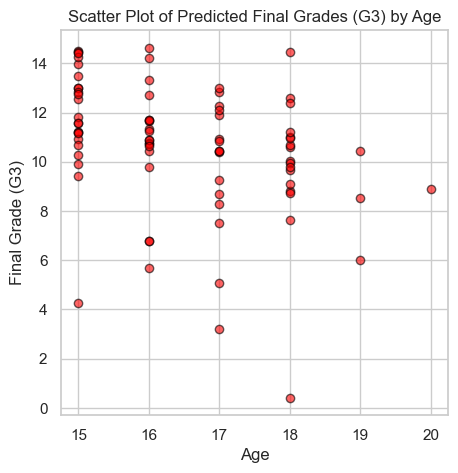

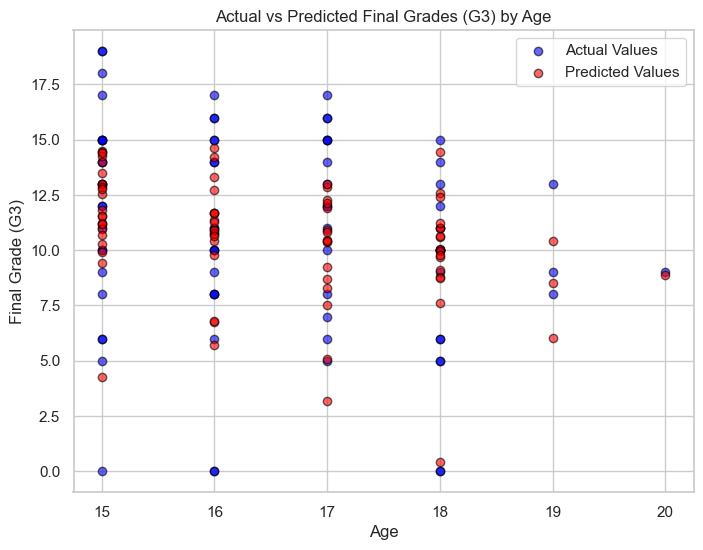

In [826]:
import matplotlib.pyplot as plt

predicted = linear_reg_model.predict(X_test)  # Predicted values from the regression model
actual = y_test  # Actual values from the test set

# 1. Plot for Actual Values
plt.figure(figsize=(5, 5))
plt.scatter(X_test['age'], actual, color='blue', edgecolor='black', alpha=0.6)
plt.title('Scatter Plot of Actual Final Grades (G3) by Age')
plt.xlabel('Age')
plt.ylabel('Final Grade (G3)')
plt.grid(True)
plt.show()

# 2. Plot for Predicted Values
plt.figure(figsize=(5, 5))
plt.scatter(X_test['age'], predicted, color='red', edgecolor='black', alpha=0.6)
plt.title('Scatter Plot of Predicted Final Grades (G3) by Age')
plt.xlabel('Age')
plt.ylabel('Final Grade (G3)')
plt.grid(True)
plt.show()

# 3. Combined Plot: Actual vs Predicted in one plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test['age'], actual, label='Actual Values', color='blue', edgecolor='black', alpha=0.6)
plt.scatter(X_test['age'], predicted, label='Predicted Values', color='red', edgecolor='black', alpha=0.6)
plt.title('Actual vs Predicted Final Grades (G3) by Age')
plt.xlabel('Age')
plt.ylabel('Final Grade (G3)')
plt.legend()
plt.grid(True)
plt.show()


## Scatter Plot Interpretations

1. Actual Final Grades (G3) by Age
- The scatter plot shows the actual final grades for students based on their age. There is no clear trend or relationship between age and final grades

2. Predicted Final Grades (G3) by Age
- Similar to the actual values, predicted grades show no clear age-based trend and are more tightly clustered around certain values (especially between 8 and 14).

3. Combined Plot (Actual vs Predicted)
- This plot overlays the actual and predicted grades for comparison. The predicted values generally align with actual values but are less spread out, indicating that the model may not fully capture the variability in the actual grades.

<h1 style="text-align: center;">Data Set B</h1>

# **PORTUGESE STUDENTS DATA**

In [829]:
import os
import pandas as pd
import numpy as np

In [830]:
path=r'C:\Users\hajra\Downloads\Python Foundation'
df_por= pd.read_csv(path+r"\student-por.csv",delimiter=";")
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [831]:
df_por.shape #no of observations (), #649 rows, 33 columns
df_por.info() #request meta information on whole dataset
df_por.columns #request all columns from dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# **1. Univariate Descriptive Statistics**

## Converting each non-numeric column to numeric for Descriptive Statistics

In [834]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initializing a LabelEncoder instance
label_encoder = LabelEncoder()

# Applying label encoding to all non-numeric (categorical) columns
for column in df_por.columns:
    if df_por[column].dtype == 'object':  # Check if the column is categorical (non-numeric)
        df_por[column] = label_encoder.fit_transform(df_por[column])

# Now that all columns are numeric, calculate descriptive statistics
des_stats = pd.DataFrame({
    'mean': df_por.mean(),
    'median': df_por.median(),
    'std_dev': df_por.std(),
    'count': df_por.count(),
    'min': df_por.min(),
    'max': df_por.max(),
    '25%': df_por.quantile(0.25),
    '50%': df_por.quantile(0.50),  # equivalent to median
    '75%': df_por.quantile(0.75)
})

des_stats

,mean,median,std_dev,count,min,max,25%,50%,75%
school,0.348228,0.0,0.476776,649,0,1,0.0,0.0,1.0
sex,0.409861,0.0,0.492187,649,0,1,0.0,0.0,1.0
age,16.744222,17.0,1.218138,649,15,22,16.0,17.0,18.0
address,0.696456,1.0,0.460143,649,0,1,0.0,1.0,1.0
famsize,0.295840,0.0,0.456771,649,0,1,0.0,0.0,1.0
Pstatus,0.876733,1.0,0.328996,649,0,1,1.0,1.0,1.0
Medu,2.514638,2.0,1.134552,649,0,4,2.0,2.0,4.0
Fedu,2.306626,2.0,1.099931,649,0,4,1.0,2.0,3.0
Mjob,1.941448,2.0,1.248317,649,0,4,1.0,2.0,3.0
Fjob,2.224961,2.0,0.863487,649,0,4,2.0,2.0,3.0


### Univariate Descriptive Statistics - Interpretation

- **Age**: The mean age is **17.0** with a standard deviation of **1.21**
- **Study Time**: Students spend an average of **1.93** units of study time (on a scale of 1-4) with a standard deviation of **0.83**.
- **Failures**: The average number of past failures is **0.22**, with most students having zero failures.
- **Absences**: The mean number of absences is **3.65**, with absences ranging from **0** to **32** days.
- **Final Grades (G3)**: The mean final grade is **11.91**, with a standard deviation of **3.23**. Grades range from **0** to **20**.

### Categorical Variables
- **Sex**: The proportion of gender is **0.49**, indicating a nearly balanced distribution.
- **Pstatus (Parental Status)**: The majority of students (around **87.7%**) live with both parents.
- In short, dataset shows moderate variation in final grades and absences, while age and study time are more consistent across the population.


# **2. Bivariate Descriptive Statistics**

In [837]:
# Bivariate statistics (correlation matrix)
bivar_stats = df_por.corr()

# Displaying the correlation matrix
print("Bivariate Statistics (Correlation Matrix):")
bivar_stats

Bivariate Statistics (Correlation Matrix):


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.083050,0.087170,-0.354520,0.022252,0.028120,-0.254787,-0.209806,-0.206829,-0.081872,...,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163933,-0.292626,-0.269776,-0.284294
sex,-0.083050,1.000000,-0.043662,0.025503,0.098205,0.064700,0.119127,0.083913,0.149635,0.080466,...,0.083473,0.146305,0.058178,0.282696,0.320785,0.139547,0.021336,-0.104109,-0.104005,-0.129077
age,0.087170,-0.043662,1.000000,-0.025848,-0.002470,-0.005631,-0.107832,-0.121050,-0.071770,-0.050846,...,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
address,-0.354520,0.025503,-0.025848,1.000000,0.046113,-0.094635,0.190320,0.141493,0.159761,-0.006535,...,-0.033897,-0.036647,0.015475,-0.047304,-0.012416,0.003787,0.073653,0.157127,0.154600,0.167637
famsize,0.022252,0.098205,-0.002470,0.046113,1.000000,-0.239608,-0.014325,-0.039538,0.019600,-0.059443,...,0.004641,-0.021257,-0.004312,0.060482,0.081958,0.002448,0.004645,0.047230,0.038891,0.045016
Pstatus,0.028120,0.064700,-0.005631,-0.094635,-0.239608,1.000000,-0.057174,-0.031856,-0.028874,0.054306,...,0.051303,0.037585,0.031086,0.041513,0.070976,0.012638,-0.117492,0.015251,0.018689,-0.000754
Medu,-0.254787,0.119127,-0.107832,0.190320,-0.014325,-0.057174,1.000000,0.647477,0.459337,0.152582,...,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.209806,0.083913,-0.121050,0.141493,-0.039538,-0.031856,0.647477,1.000000,0.290703,0.211604,...,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
Mjob,-0.206829,0.149635,-0.071770,0.159761,0.019600,-0.028874,0.459337,0.290703,1.000000,0.202651,...,0.025049,0.053927,0.003182,0.049576,0.025657,0.081525,0.028519,0.181551,0.153875,0.148252
Fjob,-0.081872,0.080466,-0.050846,-0.006535,-0.059443,0.054306,0.152582,0.211604,0.202651,1.000000,...,0.039500,-0.037952,-0.031913,0.055389,0.044607,-0.025069,-0.047477,0.109847,0.086343,0.052953


### Bivariate Descriptive Statistics - Interpretation

- **School and Age**: Positive correlation (**0.087**), indicating older students slightly more likely to attend certain schools.
- **Age and Study Time**: Negative correlation (**-0.008**), suggesting older students spend less time studying.
- **Parents' Education (Medu, Fedu) and Study Time**: Positive correlations (**0.09** and **0.05**), implying students with more educated parents tend to study more.
- **Absences and Final Grade (G3)**: Negative correlation (**-0.13**), indicating students with more absences generally achieve lower final grades.
- **Alcohol Consumption (Dalc, Walc) and Health**: Slight negative correlation (**-0.08** for Dalc and **-0.04** for Walc), suggesting higher alcohol consumption could slightly affect health.
- Study time, and parental education show some influence on student outcomes, while absences have a negative impact on grades.


### **Correlation Heat Map and Pair plots**

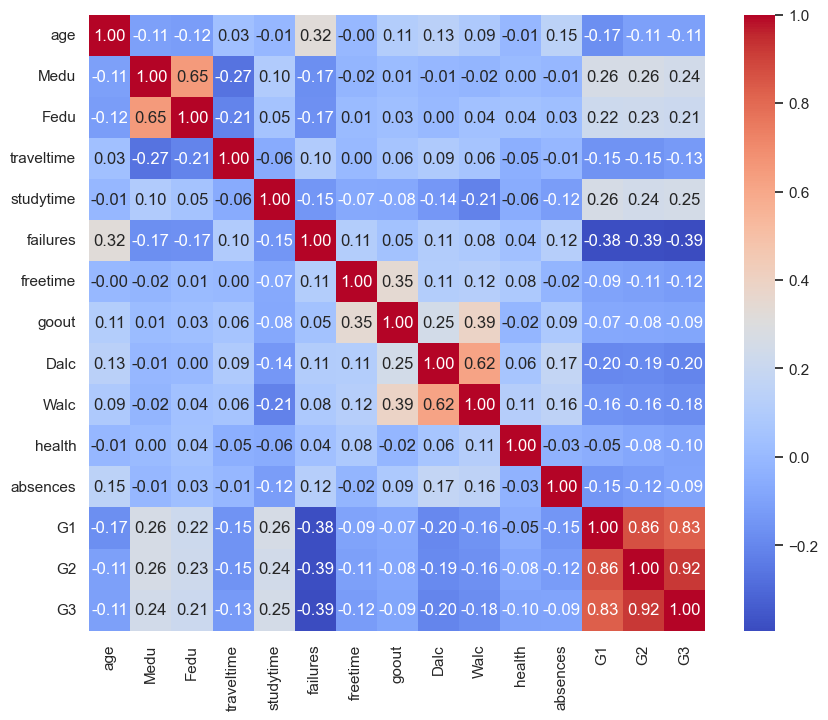

In [840]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

numerical_cols = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
    'failures', 'freetime', 'goout', 'Dalc',
    'Walc', 'health', 'absences', 'G1', 'G2', 'G3'
]

# Computing the correlation matrix for these columns
corr = df_por[numerical_cols].corr()

# Creating a heatmap with the correlation matrix
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.show()

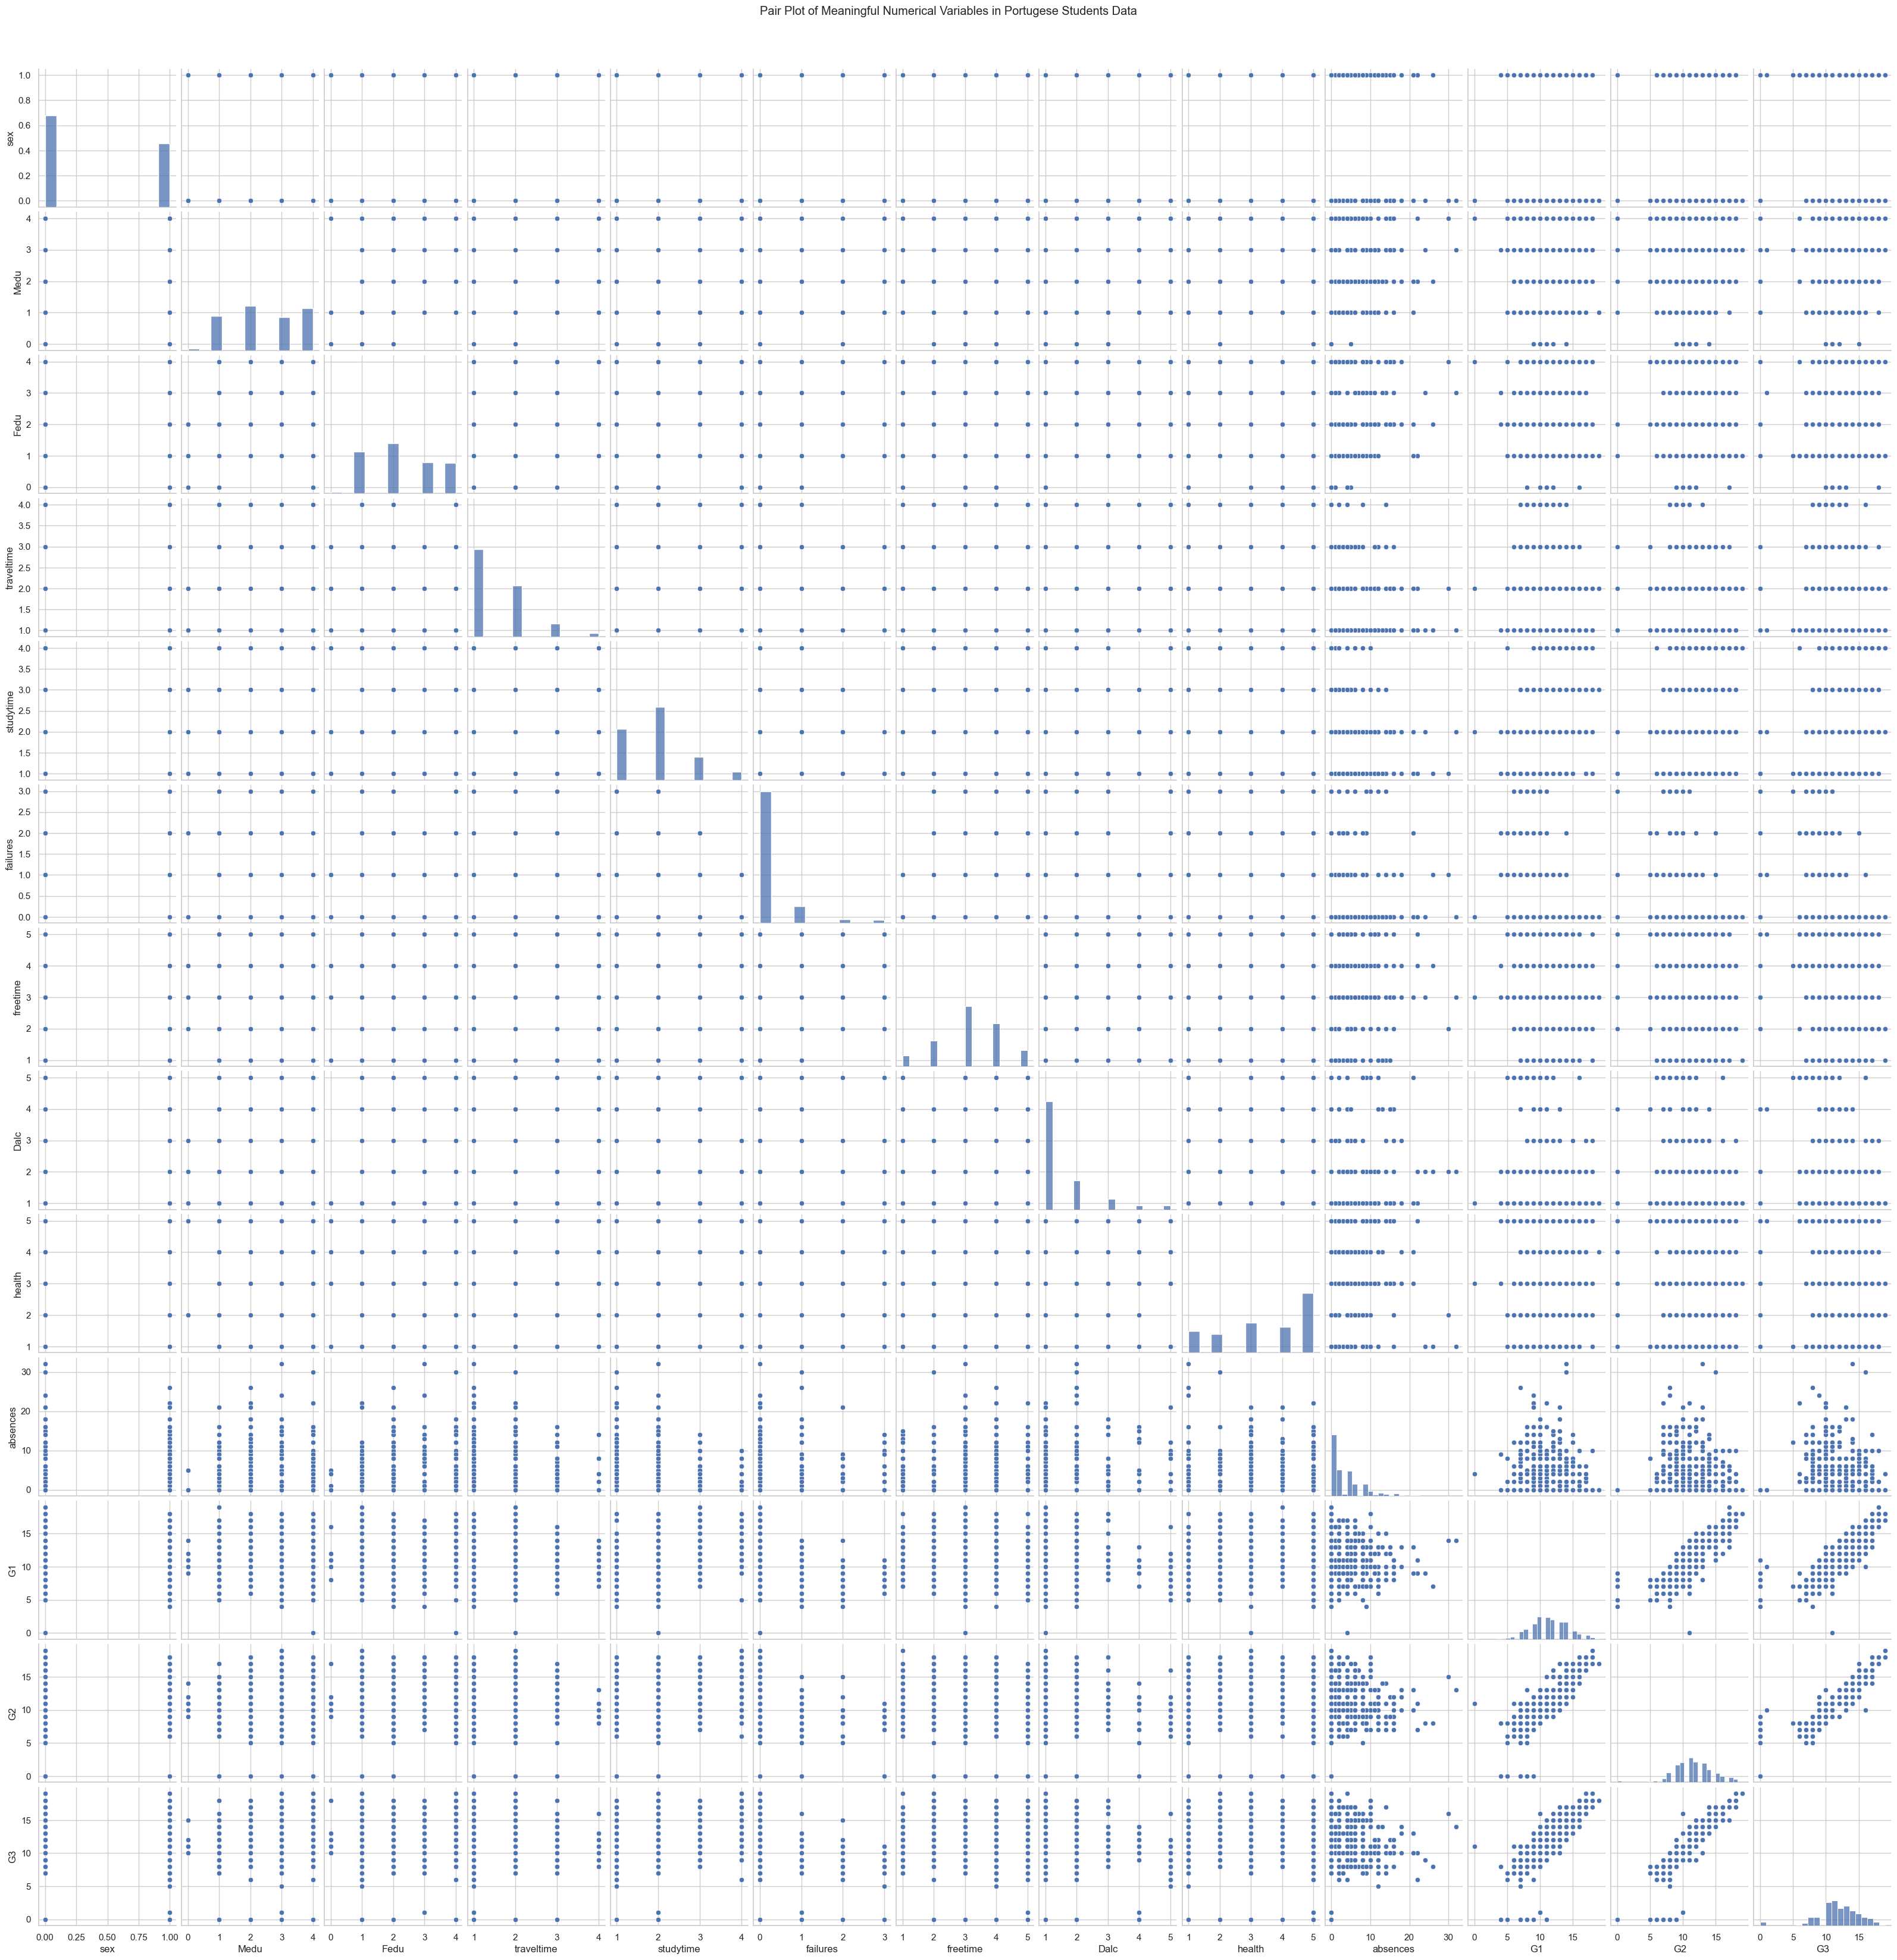

In [841]:
# Selecing only meaningful numerical columns
numerical_cols = [
    'sex', 'Medu', 'Fedu', 'traveltime', 'studytime', 
    'failures', 'freetime', 'Dalc', 'health', 'absences', 
    'G1', 'G2', 'G3'
]
# Creating a pair plot
sns.pairplot(df_por[numerical_cols])

plt.suptitle('Pair Plot of Meaningful Numerical Variables in Portugese Students Data', y=1.02)  # Adjust title position
plt.show()

# **3. Average final grade (G3) by gender**

In [843]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


In [844]:
# 'sex' is the column representing gender
avg_grade_by_gender1 = df_por.groupby('sex')['G1'].mean()
avg_grade_by_gender2 = df_por.groupby('sex')['G2'].mean()
avg_grade_by_gender3 = df_por.groupby('sex')['G3'].mean()

# Displaing the average grades by gender
print("\nAverage Final Grade by Gender for G1, G2 and G3 respectively are:")
avg_grade_by_gender1, avg_grade_by_gender2, avg_grade_by_gender3


Average Final Grade by Gender for G1, G2 and G3 respectively are:


(sex
 0    11.637076
 1    11.056391
 Name: G1, dtype: float64,
 sex
 0    11.822454
 1    11.206767
 Name: G2, dtype: float64,
 sex
 0    12.253264
 1    11.406015
 Name: G3, dtype: float64)

### Interpretation for G3:
- **Females (0)** have a higher average final grade (**12.25**) compared to **males (1)**, whose average final grade is **11.41**.
- This indicates that, on average, female students slightly outperform male students in the final grade (G3).
- Conclusion: The difference in average final grades between genders is small, but females tend to have a marginally higher score.

In [846]:
# Checking the unique values in the 'sex' column to verify the encoding and for clarity in code
unique_values_in_sex_1 = df_por['sex'].unique()

# Mapping the encoded values back to the original values
sex_mapping1 = {
    0: 'Female',
    1: 'Male'
}
sex_mapping1, unique_values_in_sex_1

({0: 'Female', 1: 'Male'}, array([0, 1]))

# **4. Plotting a histogram for the final grade (G3) and some scatter plots to visualize relationships between variables**

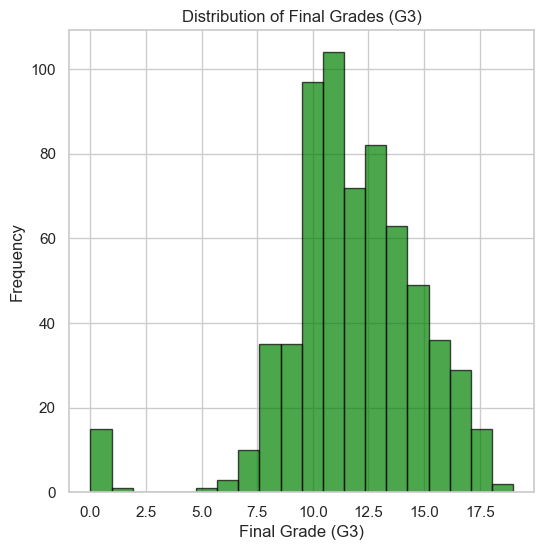

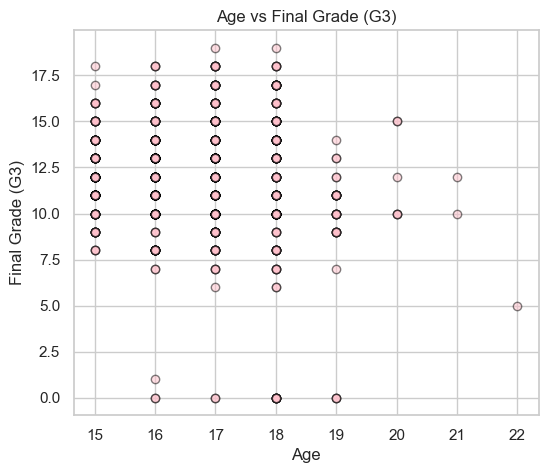

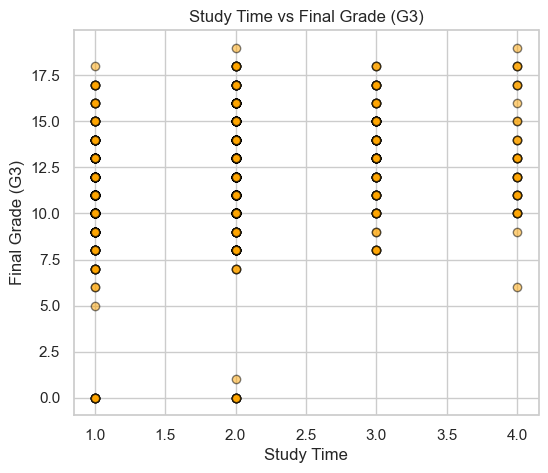

In [848]:
import matplotlib.pyplot as plt

# Histogram for the final grade (G3)
plt.figure(figsize=(6,6))
plt.hist(df_por['G3'], bins=20, edgecolor='black', alpha=0.7, color='green')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of age vs final grade
plt.figure(figsize=(6,5))
plt.scatter(df_por['age'], df_por['G3'], alpha=0.5,color='pink',edgecolor='black')
plt.title('Age vs Final Grade (G3)')
plt.xlabel('Age')
plt.ylabel('Final Grade (G3)')
plt.show()

# Scatter plot of study time vs final grade
plt.figure(figsize=(6,5))
plt.scatter(df_por['studytime'], df_por['G3'], alpha=0.5,color='orange',edgecolor='black')
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

### Plot Interpretations

### 1. Histogram of Final Grades (G3)
- The histogram shows that most students have final grades between 10 and 15.
- The distribution is somewhat normal, with fewer students scoring very low or very high.

### 2. Scatter Plot: Age vs Final Grades (G3)
- The scatter plot shows no clear relationship between age and final grades.
- Students across all ages (15 to 19) seem to have a wide range of grades, with no strong correlation.

### 3. Scatter Plot: Study Time vs Final Grades (G3)
- There is no significant linear relationship between study time and final grades.
- Students who study between 1 to 4 units of time show varied performance, with grades dispersed across the entire range.


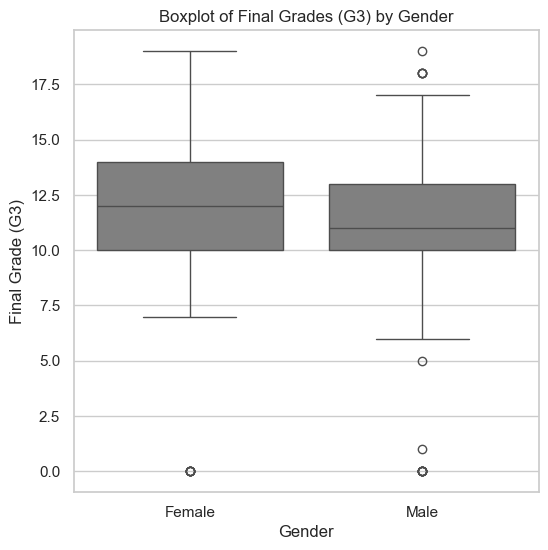

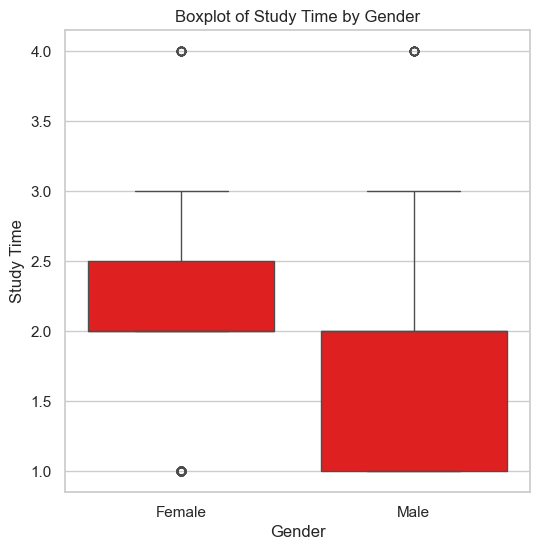

In [850]:
import seaborn as sns

# Boxplot of final grades (G3) by gender
plt.figure(figsize=(6, 6))
sns.boxplot(x='sex', y='G3', data=df_por, color='gray')
plt.title('Boxplot of Final Grades (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Grade (G3)')
plt.xticks([0, 1], ['Female', 'Male'])  # Assuming '0' is Female, '1' is Male
plt.show()

# Boxplot of study time by gender
plt.figure(figsize=(6, 6))
sns.boxplot(x='sex', y='studytime', data=df_por,color='red')
plt.title('Boxplot of Study Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Study Time')
plt.xticks([0, 1], ['Female', 'Male'])  # Assuming '0' is Female, '1' is Male
plt.show()

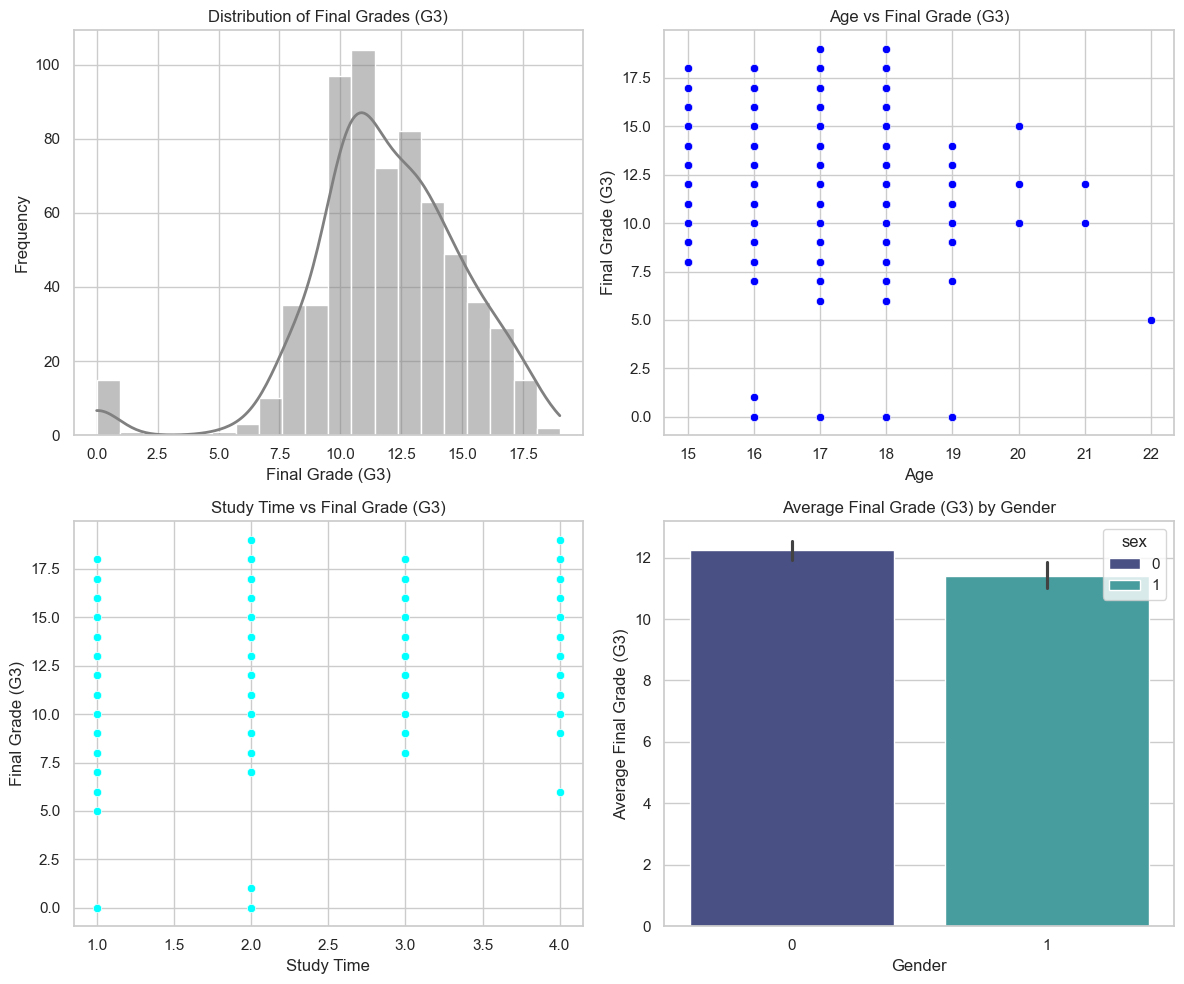

In [851]:
# Setting a format for the plots
sns.set(style="whitegrid")

# Creating a figure for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1: Distribution of Final Grades (G3) - Histogram with KDE
sns.histplot(df_por['G3'], bins=20, kde=True, color='gray', line_kws={'color': 'blue', 'linewidth': 2}, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Final Grades (G3)')
axes[0, 0].set_xlabel('Final Grade (G3)')
axes[0, 0].set_ylabel('Frequency')

# Subplot 2: Scatter plot of Age vs Final Grade (G3)
sns.scatterplot(x='age', y='G3', data=df_por, color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Age vs Final Grade (G3)')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Final Grade (G3)')

# Subplot 3: Scatter plot of Study Time vs Final Grade (G3)
sns.scatterplot(x='studytime', y='G3', data=df_por, color='cyan', ax=axes[1, 0])
axes[1, 0].set_title('Study Time vs Final Grade (G3)')
axes[1, 0].set_xlabel('Study Time')
axes[1, 0].set_ylabel('Final Grade (G3)')

# Subplot 4: Bar Plot of Average Final Grade (G3) by Gender (with updated hue and palette)
sns.barplot(x='sex', y='G3', data=df_por, ax=axes[1, 1], hue='sex', palette='mako')
axes[1, 1].set_title('Average Final Grade (G3) by Gender')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Average Final Grade (G3)')

# Adjust the layout for better spacing between plots
plt.tight_layout()
plt.show()

## Subplot Interpretations

### 1. Distribution of Final Grades (G3)
- The histogram shows that most students' final grades are between 10 and 15, with a peak around 11. The distribution has a slight skew towards higher grades.

### 2. Age vs Final Grade (G3)
- There is no clear relationship between age and final grades. Students of all ages (15 to 22) have a wide range of grades, with no obvious trend.

### 3. Study Time vs Final Grade (G3)
- The scatter plot shows no significant correlation between study time and final grades. Students with varying study times have grades scattered across the spectrum.

### 4. Average Final Grade (G3) by Gender
- Female students (0) have a slightly higher average final grade (~12.25)


# **5. Linear Regression with G3**

In [854]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm

# Prepare the data, excluding G1 and G2, and target as G3
X = df_por.drop(columns=['G1', 'G2', 'G3'])  # Features excluding G1, G2, and the target G3
y = df_por['G3']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_rg_model = LinearRegression()
linear_rg_model.fit(X_train, y_train)

# Predicting the test set
y_pred = linear_rg_model.predict(X_test)

# Evaluating the model
linear_reg_score = linear_rg_model.score(X_test, y_test)

linear_reg_score=round(linear_reg_score,4)
linear_reg_score

0.1719

In [855]:
X_train_sm = sm.add_constant(X_train)  # Add constant for intercept
statsmodel = sm.OLS(y_train, X_train_sm).fit()  # Fit the model
statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     9.538
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           5.77e-33
Time:                        15:41:26   Log-Likelihood:                -1227.5
No. Observations:                 519   AIC:                             2517.
Df Residuals:                     488   BIC:                             2649.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8390      2.149      4.579      0.000       5.617      14.061
school        -1.5762      0.295     -5.349      0.000      -2.155      -0.997
sex           -0.4177      0.280     -1.490      0.137      -0.968       0.133
age            0.1351      0.113      1.190      0.235      -0.088       0.358
address        0.2038      0.290      0.704      0.482      -0.365       0.773
famsize        0.2143      0.277      0.773      0.440      -0.330       0.759
Pstatus       -0.2247      0.401     -0.561      0.575      -1.012       0.563
Medu           0.0524      0.158      0.331      0.741      -0.259       0.363
Fedu           0.2813      0.149      1.894      0.059      -0.011       0.573
Mjob           0.0641      0.113      0.568      0.570      -0.157       0.286
Fjob          -0.2979      0.148     -2.018      0.044      -0.588      -0.008
reason         0.0329      0.104      0.318      0.751      -0.170       0.236
guardian      -0.0076      0.254     -0.030      0.976      -0.507       0.492
traveltime     0.0167      0.172      0.097      0.923      -0.321       0.354
studytime      0.3697      0.159      2.322      0.021       0.057       0.683
failures      -1.4199      0.230     -6.163      0.000      -1.873      -0.967
schoolsup     -1.5844      0.405     -3.916      0.000      -2.379      -0.789
famsup         0.0547      0.255      0.215      0.830      -0.446       0.556
paid          -0.5641      0.499     -1.130      0.259      -1.545       0.417
activities     0.2198      0.246      0.895      0.371      -0.263       0.703
nursery       -0.1720      0.301     -0.571      0.568      -0.764       0.420
higher         1.6803      0.415      4.047      0.000       0.864       2.496
internet       0.3865      0.304      1.271      0.204      -0.211       0.984
romantic      -0.3518      0.257     -1.370      0.171      -0.857       0.153
famrel         0.1243      0.128      0.972      0.331      -0.127       0.376
freetime      -0.0894      0.123     -0.725      0.469      -0.332       0.153
goout         -0.1350      0.120     -1.128      0.260      -0.370       0.100
Dalc          -0.3058      0.162     -1.888      0.060      -0.624       0.013
Walc          -0.0265      0.131     -0.203      0.839      -0.283       0.230
health        -0.2140      0.085     -2.519      0.012      -0.381      -0.047
absences      -0.0532      0.027     -1.949      0.052      -0.107       0.000
==============================================================================
Omnibus:                      102.735   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.625
Skew:                          -0.947   Prob(JB):                     6.39e-65
Kurtosis:                       6.175   Cond. No.                         364.
==

## OLS Regression Results - Interpretation
### Model Summary
- **R-squared**: 0.370, meaning the model explains **37.0%** of the variance in final grades (G3), which is a moderate improvement in explanatory power compared to previous models.
- **Adjusted R-squared**: 0.331, slightly lower than the R-squared, accounting for the number of predictors.
- **F-statistic**: 9.538 with a **p-value of 5.77e-33**, indicating the overall model is statistically significant.

### Key Variables
- **Constant (Intercept)**: 9.8390, statistically significant (**p = 0.000**), setting a baseline effect on G3 when all predictors are zero.
- **School**: Coefficient of -1.5760, statistically significant (**p = 0.000**), indicating that school type has a strong negative effect on final grades.
- **Failures**: Coefficient of -1.4199, statistically significant (**p = 0.000**), showing that past failures have a large negative impact on final grades.
- **Higher Education Support (higher)**: Coefficient of 1.6803, statistically significant (**p = 0.000**), suggesting that support for higher education positively impacts final grades.
- **Sex**: Coefficient of -0.4177, not statistically significant (**p = 0.137**), indicating gender does not have a strong effect on final grades in this model.

### Non-Significant Variables
- **Age** (p = 0.235), **address** (p = 0.442), **famsize** (p = 0.440), **studytime** (p = 0.061), and several other predictors show no statistically significant impact on final grades (G3), indicating limited influence.

### Diagnostics
- **Omnibus** and **Jarque-Bera (JB)** tests indicate that residuals are not normally distributed (**Prob(Omnibus) = 0.000** and **Prob(JB) = 6.39e-65**).
- **Durbin-Watson**: 1.984, suggesting no significant autocorrelation in the residuals.
- **Condition Number**: 364, indicating moderate multicollinearity among predictors.

### Conclusion
- The model suggests that **school**, **failures**, and **higher education support** are significant predictors of final grades.
- The moderate R-squared value implies that other factors not included in this model may be influencing final grades.
- Diagnostic tests indicate potential issues with residual normality, which may affect the accuracy of p-values and confidence intervals.

In [857]:
# Extracting the summary table containing coefficient details
summary_df = statsmodel.summary2().tables[1]

# Set a significance level
alpha = 0.05

# Filter to find significant variables based on p-value
significant_vars = summary_df[summary_df['P>|t|'] < alpha]

# Display the significant variables with coefficients and p-values
print("\nStatistically Significant Variables in Portugese Students Data:")
significant_vars[['Coef.', 'P>|t|']]


Statistically Significant Variables in Portugese Students Data:


,Coef.,P>|t|
const,9.838951,5.949777e-06
school,-1.576170,1.360689e-07
Fjob,-0.297886,4.409640e-02
studytime,0.369745,2.063397e-02
failures,-1.419857,1.494976e-09
schoolsup,-1.584362,1.026951e-04
higher,1.680263,6.035205e-05
health,-0.214045,1.208713e-02


In [858]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 2.110999028151866
Root Mean Squared Error (RMSE): 2.8417957681628856


## Model Evaluation Metrics

- **Mean Absolute Error (MAE)**: 2.11  
  - This metric represents the average absolute difference between predicted and actual values. An MAE of **2.11** suggests that, on average, the model’s predictions are off by about **2.11 points** from the actual values.

- **Root Mean Squared Error (RMSE)**: 2.84  
  - The RMSE measures the square root of the average of squared differences between predicted and actual values. An RMSE of **2.84** indicates a typical prediction error of around **2.84 points**. RMSE is more sensitive to larger errors due to squaring the differences, making it useful for highlighting significant prediction errors.

### Conclusion
- Both the MAE and RMSE values indicate that the model has some predictive capability, though there is still a moderate level of error, with predictions differing by around 2 to 3 points on average from the actual values.

# **6. Probit Regression Results**

In [861]:
# Probit Regression Model (defining success as G3 >= 10)
y_probit = (df_por['G3'] >= 10).astype(int)

# Adding constant to the features for probit regression
X_w_constant = sm.add_constant(X)

# Fit probit model
probit_mod = sm.Probit(y_probit, X_w_constant).fit()
probit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.299312
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                     G3   No. Observations:                  649
Model:                         Probit   Df Residuals:                      618
Method:                           MLE   Df Model:                           30
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:                  0.3035
Time:                        15:41:27   Log-Likelihood:                -194.25
converged:                       True   LL-Null:                       -278.89
Covariance Type:            nonrobust   LLR p-value:                 2.315e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8283      1.305     -0.635      0.526      -3.386       1.729
school        -1.1023      0.177     -6.229      0.000      -1.449      -0.755
sex           -0.2183      0.175     -1.244      0.213      -0.562       0.126
age            0.1560      0.071      2.198      0.028       0.017       0.295
address        0.1141      0.169      0.677      0.498      -0.216       0.444
famsize        0.1890      0.174      1.087      0.277      -0.152       0.530
Pstatus        0.0710      0.239      0.297      0.766      -0.397       0.539
Medu          -0.0451      0.091     -0.494      0.622      -0.224       0.134
Fedu           0.0939      0.089      1.050      0.294      -0.081       0.269
Mjob           0.0409      0.068      0.598      0.550      -0.093       0.175
Fjob          -0.1780      0.093     -1.920      0.055      -0.360       0.004
reason         0.0177      0.069      0.257      0.797      -0.117       0.153
guardian      -0.1920      0.155     -1.240      0.215      -0.496       0.111
traveltime     0.1296      0.105      1.234      0.217      -0.076       0.335
studytime      0.0998      0.102      0.980      0.327      -0.100       0.299
failures      -0.6245      0.112     -5.574      0.000      -0.844      -0.405
schoolsup     -0.2303      0.259     -0.889      0.374      -0.738       0.277
famsup         0.1027      0.154      0.665      0.506      -0.200       0.406
paid          -0.3439      0.278     -1.239      0.215      -0.888       0.200
activities     0.1991      0.152      1.310      0.190      -0.099       0.497
nursery       -0.2103      0.183     -1.149      0.251      -0.569       0.148
higher         0.7664      0.204      3.763      0.000       0.367       1.166
internet      -0.0339      0.178     -0.190      0.849      -0.383       0.316
romantic      -0.1487      0.154     -0.963      0.335      -0.451       0.154
famrel         0.0258      0.073      0.354      0.724      -0.117       0.169
freetime      -0.0408      0.075     -0.545      0.585      -0.187       0.106
goout         -0.0313      0.073     -0.430      0.667      -0.174       0.111
Dalc          -0.0076      0.092     -0.083      0.934      -0.187       0.172
Walc          -0.0534      0.077     -0.690      0.490      -0.205       0.098
health        -0.0521      0.053     -0.976      0.329      -0.157       0.053
absences      -0.0399      0.016     -2.528      0.011      -0.071      -0.009
==============================================================================
"""

## Probit Regression Results - Interpretation

- The model predicts the probability of a final grade (G3) being 10 or higher.
- **Pseudo R-squared**: 0.3035, indicating the model explains about **30.35%** of the variation in the outcome.
- **Significant Variables**:
  - **School**: Negative and significant (**p < 0.001**), indicating students from certain schools are less likely to score G3 ≥ 10.
  - **Sex**: Positive but not significant (**p = 0.213**), showing no strong impact of gender on scoring G3 ≥ 10.
  - Other variables such as age, address, and study time show no significant effect on the outcome.

### Conclusion:
- The model has moderate explanatory power, but the strongest predictor is the school variable, with other factors showing limited influence.


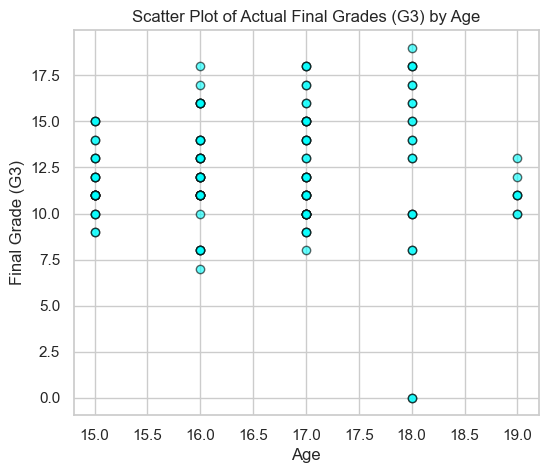

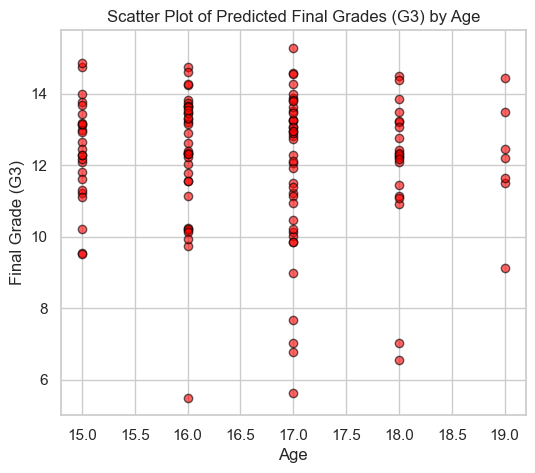

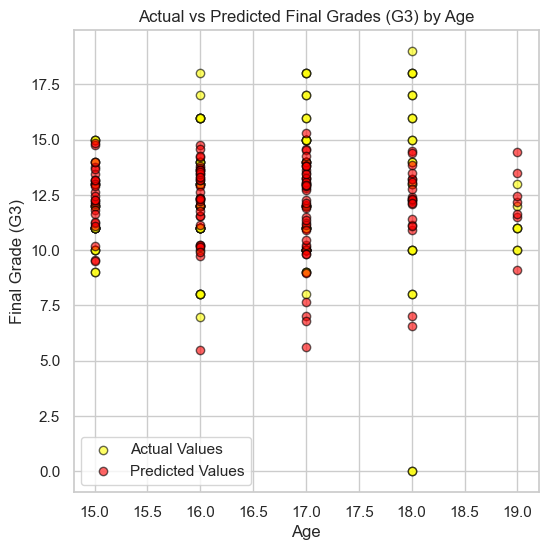

In [863]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and have the predictions
predicted = linear_rg_model.predict(X_test)  # Predicted values from the regression model
actual = y_test  # Actual values from the test set

# 1. Plot for Actual Values
plt.figure(figsize=(6, 5))
plt.scatter(X_test['age'], actual, color='cyan', edgecolor='black', alpha=0.6)
plt.title('Scatter Plot of Actual Final Grades (G3) by Age')
plt.xlabel('Age')
plt.ylabel('Final Grade (G3)')
plt.grid(True)
plt.show()

# 2. Plot for Predicted Values
plt.figure(figsize=(6, 5))
plt.scatter(X_test['age'], predicted, color='red', edgecolor='black', alpha=0.6)
plt.title('Scatter Plot of Predicted Final Grades (G3) by Age')
plt.xlabel('Age')
plt.ylabel('Final Grade (G3)')
plt.grid(True)
plt.show()

# 3. Combined Plot: Actual vs Predicted in one plot
plt.figure(figsize=(6, 6))
plt.scatter(X_test['age'], actual, label='Actual Values', color='yellow', edgecolor='black', alpha=0.6)
plt.scatter(X_test['age'], predicted, label='Predicted Values', color='red', edgecolor='black', alpha=0.6)
plt.title('Actual vs Predicted Final Grades (G3) by Age')
plt.xlabel('Age')
plt.ylabel('Final Grade (G3)')
plt.legend()
plt.grid(True)
plt.show()

### Plot Interpretations

 1. Scatter Plot of Actual Final Grades (G3) by Age
- The actual grades are widely scattered across different ages.
- There is no clear pattern or trend between age and final grades.

 2. Scatter Plot of Predicted Final Grades (G3) by Age
- The predicted grades also show no significant correlation with age.
- The predicted values seem to be more concentrated and do not cover the full range of actual grades.

 3. Combined Plot: Actual vs Predicted Final Grades (G3) by Age
- The actual and predicted grades show some alignment, but the model fails to capture the wide spread in actual grades.
- Predicted grades are less variable compared to actual values, suggesting limited accuracy of the model.


----------